# Project 3

## Load data sets and packages

In [1]:
# Import libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import KFold

# Import data sets
MNIST = pd.read_csv('Numbers.txt', sep=r'\s+')
CATSDOGS = pd.read_csv('catdogdata.txt', sep=r'\s+')

c:\Users\Carl Gillmert\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load and transform data

In [2]:
# Seperate labels from data
MNIST_labels = MNIST["V1"].values
MNIST_pixels = MNIST.iloc[:, 1:].values
CATSDOGS_labels = ["Cat"]*99 + ["Dog"]*99
CATSDOGS_pixels = CATSDOGS.iloc[:, :].values

# Standardize data
MNIST_scaler = MinMaxScaler()
MNIST_pixels = MNIST_scaler.fit_transform(MNIST_pixels)
CATSDOGS_scaler = MinMaxScaler()
CATSDOGS_pixels = CATSDOGS_scaler.fit_transform(CATSDOGS_pixels)

In [11]:
import warnings
warnings.filterwarnings(
    "ignore",
    message="'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.",
    category=FutureWarning,
    module="sklearn"
)
warnings.filterwarnings(
    "ignore", 
    category=RuntimeWarning
)

## MNIST: K-Means


Outer fold: 1
Best number of UMAP components: 10
Best number of clusters: 9
Silhouette score on test data: 0.61
True Label  -9  -2   0   1   2   5   6   8   9
Cluster                                       
0            0   0   0   0  37   0   0   0   0
1            1   0  63   0   6   0   1   0   0
2           32   1   2   0   0   2  50   1   0
3            0   0   0  34   0   0   0   2   0
4            0   4   0   0   5   1   0  30   0
5            0   0   0   0   1   1   0   2  32
6            0  33   0   0   0   2   0   1   0
7            0   0   0   0   0  28   0   0   0
8            0   0   0  27   1   0   0   0   0


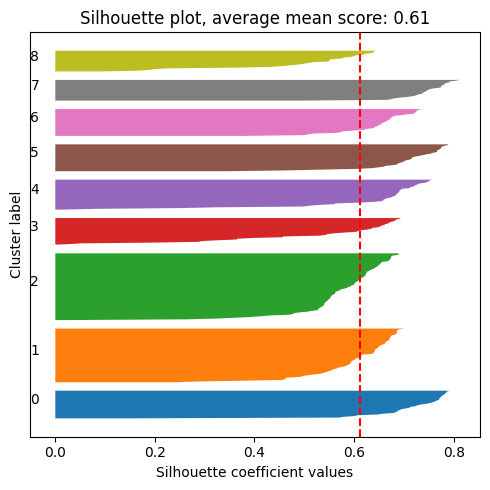


Outer fold: 2
Best number of UMAP components: 20
Best number of clusters: 9
Silhouette score on test data: 0.63
True Label  -9  -2   0   1   2   5   6   8   9
Cluster                                       
0            0   5   0   0   4   0   0  29   0
1            1   2  30   0   1   0   2   1   0
2            0   0   0  63   3   0   0   0   0
3           38   3   3   0   2   4  32   0   0
4            0   2   0   0   1   1   0   1  31
5            0   0   0   0   0  35   0   1   0
6            0   0   0   0  29   0   0   1   0
7            0  38   1   0   0   1   0   0   0
8            0   0  34   0   0   1   0   0   0


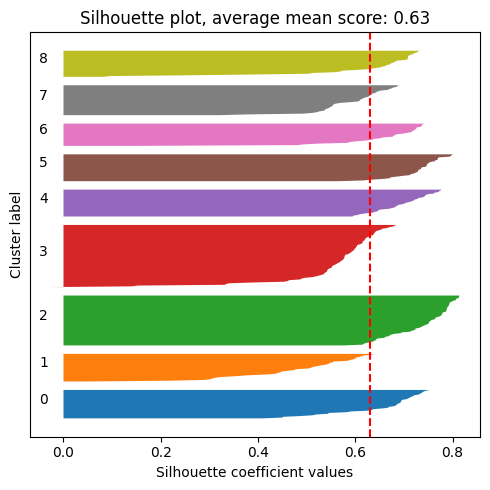


Outer fold: 3
Best number of UMAP components: 15
Best number of clusters: 9
Silhouette score on test data: 0.63
True Label  -9  -2   0   1   2   5   6   8   9
Cluster                                       
0            0   1   0   0   1   1   0   1  45
1            1   0  34   0   3   0   0   2   0
2            0   1   0  60   2   0   1   0   0
3           29   0   1   0   1   1  40   1   0
4            0  10   0   0   2   1   0  30   0
5            0   0   1   0  29   1   0   0   0
6            0  21   0   0   1   2   0   0   0
7            0   0   0   0   0  33   0   1   1
8            0   0  35   0   2   3   1   0   0


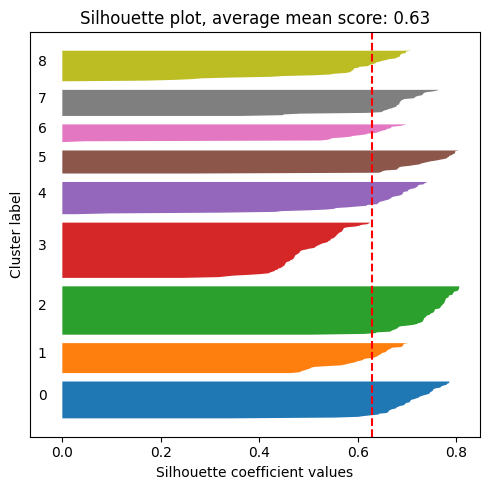


Outer fold: 4
Best number of UMAP components: 15
Best number of clusters: 8
Silhouette score on test data: 0.56
True Label  -9  -2   0   1   2   5   6   8   9
Cluster                                       
0           44   3   2   0   2   1  34   1   0
1            0   2   0   0   5   1   0  25  34
2            1   1   0  31   1   1   0   0   0
3            3   3  65   0   1   2   1   1   1
4            0  39   0   0   1   1   0   0   0
5            0   0   0   0  30   0   1   0   0
6            0   1   0   0   0  33   0   0   0
7            0   0   0  27   0   0   0   1   0


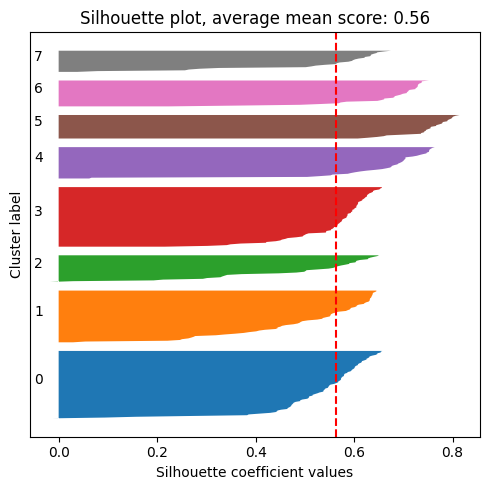


Outer fold: 5
Best number of UMAP components: 20
Best number of clusters: 8
Silhouette score on test data: 0.65
True Label  -9  -2   0   1   2   5   6   8   9
Cluster                                       
0            0   0   0   0   0  24   0   3   0
1            0   3   0  65   0   0   0   1   1
2            0   4   0   0   4   1   0  31   0
3           37   1   3   0   1   4  36   0   0
4            2   5  74   0   0   0   2   1   0
5            0   0   1   0  24   0   0   0   0
6            0  37   0   0   0   0   0   0   0
7            0   1   0   0   0   0   0   0  34


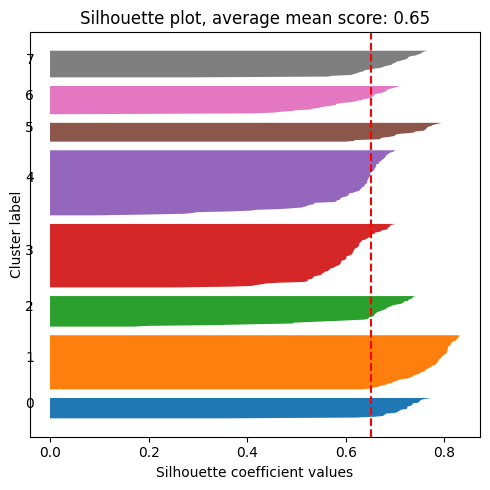

Average silhouette score: 0.62
Mean number of clusters: 8.6
Std of number of clusters: 0.49
Mean number of UMAP components: 16.0
Std of UMAP components: 3.74


In [ ]:
# Number of clusters in K-Means
k_list = np.arange(3, 20)

# UMAP 
comp_list = [2, 5, 10, 15, 20]

# Cross-validation parameters (double cross validation)
number_of_inner_k_folds = 5
number_of_outer_k_folds = 5

# Outer fold - Determines stability
outer_k_fold = KFold(
    n_splits=number_of_outer_k_folds, shuffle=True, random_state=123
)

# Store silhouette scores and best k:s
outer_silhouette_scores = []
outer_best_config = []

# For each outer fold
for i, (outer_train_index, outer_test_index) in enumerate(
        outer_k_fold.split(MNIST_pixels)):
    
    print("\nOuter fold: " + str(i + 1))

    # Divide into test and train data
    outer_train = MNIST_pixels[outer_train_index]
    outer_test = MNIST_pixels[outer_test_index]

    # Inner fold - For tuning
    inner_k_fold = KFold(
        n_splits=number_of_inner_k_folds, shuffle=True, random_state=i
    )

    # Dictionary for storing scores 
    best_config = {}

    # Keeps track of best result found
    best_inner_score = -1

    # For each UMAP number of features
    for comp in comp_list:

        # UMAP filtering
        umap = UMAP(n_components=comp)
        outer_train_umap = umap.fit_transform(outer_train)

        # For each number of cluster
        for k in k_list:

            fold_scores = []

            # For each inner fold
            for j, (inner_train_index, inner_test_index) in enumerate(
                inner_k_fold.split(outer_train_umap)):

                # Divide into test and train data
                inner_train = outer_train_umap[inner_train_index]
                inner_test = outer_train_umap[inner_test_index]

                # K-Means 
                kmeans = KMeans(
                    n_clusters=k, init='k-means++', n_init='auto'
                )
                kmeans.fit(inner_train)
                cluster_labels = kmeans.predict(inner_test)

                # Calculate silhoutte score
                sil_score = silhouette_score(inner_test, cluster_labels)
                fold_scores.append(sil_score)

            # Store best result
            mean_score = np.mean(fold_scores)
            if mean_score > best_inner_score:
                best_inner_score = mean_score
                best_config = {
                    "n_components": comp,
                    "n_clusters": k
                }

    # Train final model on entire outer training set with best config
    umap = UMAP(n_components=best_config["n_components"])
    outer_train_umap = umap.fit_transform(outer_train)
    outer_test_umap = umap.transform(outer_test)

    # K-Means again
    kmeans = KMeans(
        n_clusters=best_config["n_clusters"], init='k-means++', n_init='auto'
    )
    kmeans.fit(outer_train_umap)
    cluster_labels = kmeans.predict(outer_test_umap)

    # Calculate silhoutte score on test data
    outer_score = silhouette_score(outer_test_umap, cluster_labels)
    outer_silhouette_scores.append(outer_score)
    outer_best_config.append(best_config)

    # Print best config
    print("Best number of UMAP components: " + str(best_config["n_components"]))
    print("Best number of clusters: " + str(best_config["n_clusters"]))
    print("Silhouette score on test data: " + str(round(outer_score, 2)))

    # Print out confusion matrix (on test data)
    true_labels = MNIST_labels[outer_test_index]
    cluster_label_matrix = pd.crosstab(
        cluster_labels,
        true_labels,
        rownames=['Cluster label'], colnames=['True label']
    )
    print(cluster_label_matrix)

    # Plot silhouette scores (on test data)
    sample_outer_score = silhouette_samples(outer_test_umap, cluster_labels)
    y_lower = 10
    plt.figure(figsize=(5, 5))
    for cluster in np.unique(cluster_labels):
        ith_cluster_sil_values = sample_outer_score[cluster_labels == cluster]
        ith_cluster_sil_values.sort()
        size_cluster = ith_cluster_sil_values.shape[0]
        y_upper = y_lower + size_cluster
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values)
        plt.text(-0.05, y_lower + 0.5 * size_cluster, str(cluster))
        y_lower = y_upper + 10

    plt.title("Silhouette plot, average mean score: " + str(round(outer_score, 2)))
    plt.xlabel("Silhouette coefficient values") 
    plt.ylabel("Cluster label")
    plt.yticks([])
    plt.axvline(x=outer_score, color="red", linestyle="--")
    plt.tight_layout()
    plt.show()

# Print out some final statistics
all_k = [conf["n_clusters"] for conf in outer_best_config]
all_umap = [conf["n_components"] for conf in outer_best_config]

print("Average silhouette score: " + str(round(np.mean(outer_silhouette_scores), 2)))
print("Mean number of clusters: " + str(round(np.mean(all_k), 2)))
print("Std of number of clusters: " + str(round(np.std(all_k), 2)))
print("Mean number of UMAP components: " + str(round(np.mean(all_umap), 2)))
print("Std of UMAP components: " + str(round(np.std(all_umap), 2)))

## MNIST: DBSCAN


Outer fold: 1
Best number of UMAP components: 15
Best eps: 0.75
Best min_samples: 5
Silhouette score on test data: 0.63
True label     -9  -2   0   1   2   5   6   8   9
Cluster label                                    
-1              1   0   0   0   5   1   0   0   0
 0              1   0  64   0   5   0   1   0   0
 1              0  33   0   0   0   2   0   1   0
 2             31   1   1   0   0   2  50   1   0
 3              0   0   0  61   1   0   0   2   0
 4              0   0   0   0  36   0   0   0   0
 5              0   0   0   0   1   1   0   2  32
 6              0   4   0   0   2   1   0  30   0
 7              0   0   0   0   0  27   0   0   0


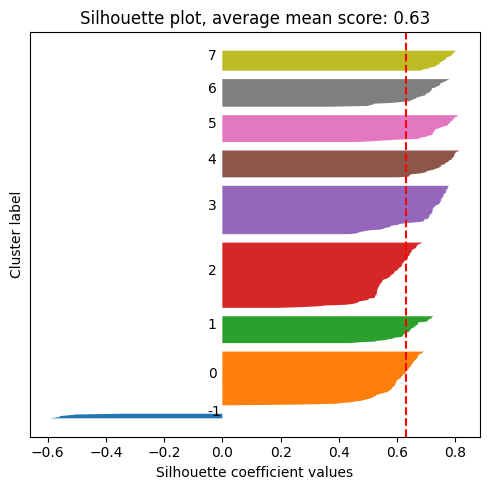


Outer fold: 2
Best number of UMAP components: 20
Best eps: 0.75
Best min_samples: 5
Silhouette score on test data: 0.47
True label     -9  -2   0   1   2   5   6   8   9
Cluster label                                    
-1              0   5   0   0   1   0   1   1   0
 0             39   4  67   0   3   5  33   1   0
 1              0   2   0   0   1   1   0   1  31
 2              0   0   0  63   2   0   0   0   0
 3              0   0   0   0   0  35   0   1   0
 4              0  35   1   0   0   1   0   0   0
 5              0   4   0   0   4   0   0  29   0
 6              0   0   0   0  29   0   0   0   0


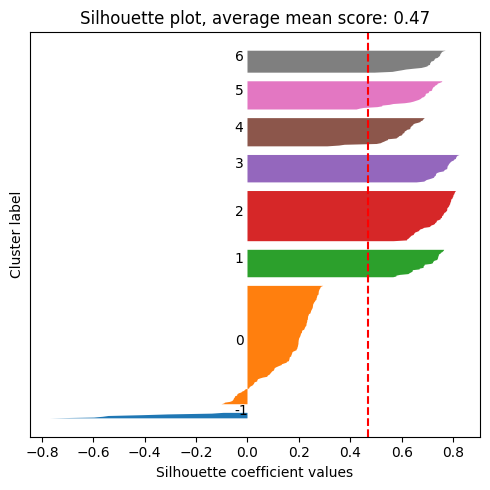


Outer fold: 3
Best number of UMAP components: 10
Best eps: 0.75
Best min_samples: 5
Silhouette score on test data: 0.61
True label     -9  -2   0   1   2   5   6   8   9
Cluster label                                    
-1              0   3   0   0   1   1   0   1   0
 0              0   9   0   0   2   1   0  29   0
 1              0   0   0   0   1   1   0   1  45
 2              1   0  69   0   5   2   1   2   0
 3              0  20   0   0   1   1   0   0   0
 4              0   0   0   0   0  34   0   1   1
 5              0   0   1   0  28   1   0   0   0
 6             29   0   1   0   1   1  40   1   0
 7              0   1   0  60   2   0   1   0   0


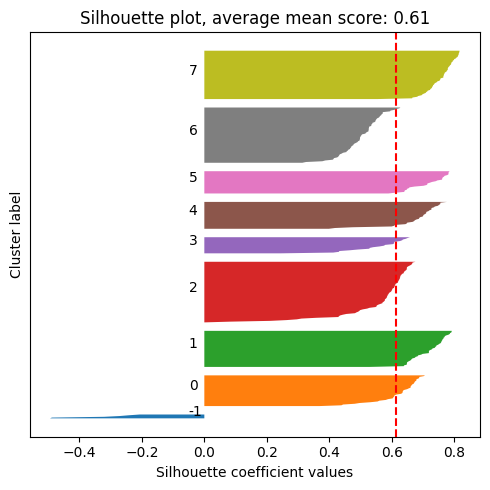


Outer fold: 4
Best number of UMAP components: 15
Best eps: 0.75
Best min_samples: 3
Silhouette score on test data: 0.59
True label     -9  -2   0   1   2   5   6   8   9
Cluster label                                    
-1              0   1   0   0   0   1   0   0   0
 0              1   1   0  58   1   1   0   1   0
 1             43   3   0   0   2   1  34   1   0
 2              4   3  67   0   1   3   1   0   1
 3              0   0   0   0   0  31   0   1   0
 4              0  38   0   0   0   1   0   0   0
 5              0   3   0   0   5   0   0  24   0
 6              0   0   0   0  30   0   1   0   0
 7              0   0   0   0   1   1   0   1  34


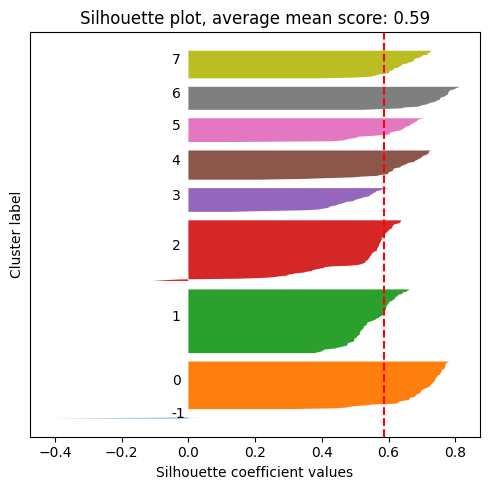


Outer fold: 5
Best number of UMAP components: 15
Best eps: 0.75
Best min_samples: 5
Silhouette score on test data: 0.63
True label     -9  -2   0   1   2   5   6   8   9
Cluster label                                    
-1              0   1   1   0   0   1   0   0   0
 0              0   1   0   0   0   0   0   0  34
 1              0   4   0   0   4   1   0  31   0
 2             37   1   1   0   1   4  36   0   0
 3              0   3   0  65   0   0   0   1   1
 4              2   5  75   0   0   0   2   1   0
 5              0  36   0   0   0   0   0   0   0
 6              0   0   0   0   0  23   0   3   0
 7              0   0   1   0  24   0   0   0   0


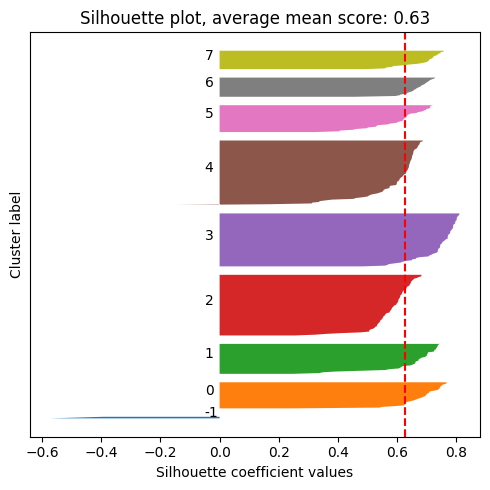

Average silhouette score: 0.58
Mean eps: 0.75
Std eps: 0.0
Mean min_samples: 4.6
Std min_samples: 0.8
Mean number of clusters: 8.2
Std of number of clusters: 0.4
Mean number of UMAP components: 15.0
Std of UMAP components: 3.16


In [12]:
# DBSCAN parameter grid
eps_list = [0.75, 0.5, 0.25, 0.125]
min_samples_list = [3, 5, 10, 15, 20]

# UMAP 
comp_list = [2, 5, 10, 15, 20]

# Cross-validation parameters (double cross validation)
number_of_inner_k_folds = 5
number_of_outer_k_folds = 5

# Outer fold - Determines stability
outer_k_fold = KFold(
    n_splits=number_of_outer_k_folds, shuffle=True, random_state=123
)

# Store silhouette scores and best k:s
outer_silhouette_scores = []
outer_best_config = []

# For each outer fold
for i, (outer_train_index, outer_test_index) in enumerate(
        outer_k_fold.split(MNIST_pixels)):
    
    print("\nOuter fold: " + str(i + 1))

    # Divide into test and train data
    outer_train = MNIST_pixels[outer_train_index]
    outer_test = MNIST_pixels[outer_test_index]

    # Inner fold - For tuning
    inner_k_fold = KFold(
        n_splits=number_of_inner_k_folds, shuffle=True, random_state=i
    )

    # Dictionary for storing scores 
    best_config = {}

    # Keeps track of best result found
    best_inner_score = -1

    # For each UMAP number of features
    for comp in comp_list:

        # UMAP filtering
        umap = UMAP(n_components=comp)
        outer_train_umap = umap.fit_transform(outer_train)

        # Loop through cluster parameter grid
        for eps in eps_list:
            for min_samples in min_samples_list:

                fold_scores = []

                # For each inner fold
                for j, (inner_train_index, inner_test_index) in enumerate(
                    inner_k_fold.split(outer_train_umap)):

                    # Divide into test and train data
                    inner_train = outer_train_umap[inner_train_index]
                    inner_test = outer_train_umap[inner_test_index]

                    # DBSCAN
                    dbscan = DBSCAN(
                        eps=eps, min_samples=min_samples
                    )
                    dbscan.fit(inner_train) 
                    cluster_labels = dbscan.fit_predict(inner_test)

                    # Compute number of clusters (excluding noise)
                    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

                    # Skip iteration if less than 2 clusters
                    if n_clusters <= 1:
                        continue

                    # Calculate silhoutte score
                    sil_score = silhouette_score(inner_test, cluster_labels)
                    fold_scores.append(sil_score)

                # Store best result
                mean_score = np.mean(fold_scores)
                actual_k = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
                if mean_score > best_inner_score:
                    best_inner_score = mean_score
                    best_config = {
                        "n_components": comp,
                        "eps": eps,
                        "min_samples": min_samples,
                        "n_clusters": actual_k
                    }

    # Train final model on entire outer training set with best config
    umap = UMAP(n_components=best_config["n_components"])
    outer_train_umap = umap.fit_transform(outer_train)
    outer_test_umap = umap.transform(outer_test)

    # DBSCAN again
    dbscan = DBSCAN(
        eps=best_config["eps"], min_samples=best_config["min_samples"]
    )
    dbscan.fit(outer_train_umap)
    cluster_labels = dbscan.fit_predict(outer_test_umap)

    # Calculate silhoutte score on test data
    outer_score = silhouette_score(outer_test_umap, cluster_labels)
    outer_silhouette_scores.append(outer_score)
    outer_best_config.append(best_config)

    # Print best config
    print("Best number of UMAP components: " + str(best_config["n_components"]))
    print("Best eps: " + str(best_config["eps"]))
    print("Best min_samples: " + str(best_config["min_samples"]))
    print("Silhouette score on test data: " + str(round(outer_score, 2)))

    # Print out confusion matrix (on test data)
    true_labels = MNIST_labels[outer_test_index]
    cluster_label_matrix = pd.crosstab(
        cluster_labels,
        true_labels,
        rownames=['Cluster label'], colnames=['True label']
    )
    print(cluster_label_matrix)

    # Plot silhouette scores (on test data)
    sample_outer_score = silhouette_samples(outer_test_umap, cluster_labels)
    y_lower = 10
    plt.figure(figsize=(5, 5))
    for cluster in np.unique(cluster_labels):
        ith_cluster_sil_values = sample_outer_score[cluster_labels == cluster]
        ith_cluster_sil_values.sort()
        size_cluster = ith_cluster_sil_values.shape[0]
        y_upper = y_lower + size_cluster
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values)
        plt.text(-0.05, y_lower + 0.5 * size_cluster, str(cluster))
        y_lower = y_upper + 10

    plt.title("Silhouette plot, average mean score: " + str(round(outer_score, 2)))
    plt.xlabel("Silhouette coefficient values") 
    plt.ylabel("Cluster label")
    plt.yticks([])
    plt.axvline(x=outer_score, color="red", linestyle="--")
    plt.tight_layout()
    plt.show()

# Print out some final statistics
all_eps = [conf["eps"] for conf in outer_best_config]
all_min_samples = [conf["min_samples"] for conf in outer_best_config]
all_umap = [conf["n_components"] for conf in outer_best_config]
all_k = [conf["n_clusters"] for conf in outer_best_config]

print("Average silhouette score: " + str(round(np.mean(outer_silhouette_scores), 2)))
print("Mean eps: " + str(round(np.mean(all_eps), 2)))
print("Std eps: " + str(round(np.std(all_eps), 2)))
print("Mean min_samples: " + str(round(np.mean(all_min_samples), 2)))
print("Std min_samples: " + str(round(np.std(all_min_samples), 2)))
print("Mean number of clusters: " + str(round(np.mean(all_k), 2)))
print("Std of number of clusters: " + str(round(np.std(all_k), 2)))
print("Mean number of UMAP components: " + str(round(np.mean(all_umap), 2)))
print("Std of UMAP components: " + str(round(np.std(all_umap), 2)))

## MNIST: GMM with BIC

In [15]:
# Number of clusters in GMM
k_list = np.arange(3, 20)

# UMAP 
comp_list = [2, 5, 10, 15, 20]

# Cross-validation parameters (double cross validation)
number_of_inner_k_folds = 5
number_of_outer_k_folds = 5

# Outer fold - Determines stability
outer_k_fold = KFold(
    n_splits=number_of_outer_k_folds, shuffle=True, random_state=123
)

# Store bic scores and best k:s
outer_bic_scores = []
outer_best_config = []

# For each outer fold
for i, (outer_train_index, outer_test_index) in enumerate(
        outer_k_fold.split(MNIST_pixels)):
    
    print("\nOuter fold: " + str(i + 1))

    # Divide into test and train data
    outer_train = MNIST_pixels[outer_train_index]
    outer_test = MNIST_pixels[outer_test_index]

    # Inner fold - For tuning
    inner_k_fold = KFold(
        n_splits=number_of_inner_k_folds, shuffle=True, random_state=i
    )

    # Dictionary for storing scores 
    best_config = {}

    # Keeps track of best result found
    best_inner_score = -1

    # For each UMAP number of features
    for comp in comp_list:

        # UMAP filtering
        umap = UMAP(n_components=comp)
        outer_train_umap = umap.fit_transform(outer_train)

        # For each number of cluster
        for k in k_list:

            fold_scores = []

            # For each inner fold
            for j, (inner_train_index, inner_test_index) in enumerate(
                inner_k_fold.split(outer_train_umap)):

                # Divide into test and train data
                inner_train = outer_train_umap[inner_train_index]
                inner_test = outer_train_umap[inner_test_index]

                # GaussianMixture
                gmm = GaussianMixture(n_components=k)
                gmm.fit(inner_train)
                cluster_labels = gmm.predict(inner_test)

                # Calculate BIC score
                bic_score = gmm.bic(inner_test)
                fold_scores.append(bic_score)

            # Store best result
            mean_score = np.mean(fold_scores)
            if mean_score < best_inner_score:
                best_inner_score = mean_score
                best_config = {
                    "n_components": comp,
                    "n_clusters": k
                }

    # Train final model on entire outer training set with best config
    umap = UMAP(n_components=best_config["n_components"])
    outer_train_umap = umap.fit_transform(outer_train)
    outer_test_umap = umap.transform(outer_test)

    # GaussianMixture again
    gmm = GaussianMixture(n_components=best_config["n_clusters"])
    gmm.fit(outer_train_umap)
    cluster_labels = gmm.predict(outer_test_umap)

    # Calculate BIC score on test data
    outer_score = gmm.bic(outer_test_umap)
    outer_bic_scores.append(outer_score)
    outer_best_config.append(best_config)

    # Print best config
    print("Best number of UMAP components: " + str(best_config["n_components"]))
    print("Best number of clusters: " + str(best_config["n_clusters"]))
    print("BIC score on test data: " + str(round(outer_score, 2)))

    # Print out confusion matrix (on test data)
    true_labels = MNIST_labels[outer_test_index]
    cluster_label_matrix = pd.crosstab(
        cluster_labels,
        true_labels,
        rownames=['Cluster label'], colnames=['True label']
    )
    print(cluster_label_matrix)

# Print out some final statistics
all_k = [conf["n_clusters"] for conf in outer_best_config]
all_umap = [conf["n_components"] for conf in outer_best_config]

print("Average BIC score: " + str(round(np.mean(outer_bic_scores), 2)))
print("Mean number of clusters: " + str(round(np.mean(all_k), 2)))
print("Std of number of clusters: " + str(round(np.std(all_k), 2)))
print("Mean number of UMAP components: " + str(round(np.mean(all_umap), 2)))
print("Std of UMAP components: " + str(round(np.std(all_umap), 2)))


Outer fold: 1
Best number of UMAP components: 20
Best number of clusters: 8
BIC score on test data: -22308.96
True label     -9  -2   0   1   2   5   6   8   9
Cluster label                                    
0               0   0  21   0   1   0   0   0   0
1               0  33   0   0  39   1   0   1   0
2              32   1   0   0   0   2  50   1   0
3               0   0   0  61   1   0   0   2   0
4               0   4   0   0   2   1   0  30   0
5               0   0   0   0   1   1   0   2  32
6               0   0   0   0   0  29   0   0   0
7               1   0  44   0   6   0   1   0   0

Outer fold: 2
Best number of UMAP components: 20
Best number of clusters: 6
BIC score on test data: -26593.58
True label     -9  -2   0   1   2   5   6   8   9
Cluster label                                    
0              38   3   3   0   2   4  32   0   0
1               0  43   1   0  33   1   0  30   0
2               0   0   0  63   3   0   0   0   0
3               0   2   0   